 <a href="https://colab.research.google.com/github/geoUFSC/learning/blob/main/Resist%C3%AAncia%20ao%20Cisalhamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Resistência ao Cisalhamento



 Parte do conteúdo deste notebook foi adaptado de:



 _Exercise material of the BSc-level course **Mechanical Properties of Loose Rocks and Soils** and the MSc-level course **Foundations of Soil Mechanics**._



 *Prof. Dr. Thomas Nagel

 Chair of Soil Mechanics and Foundation Engineering

 Geotechnical Institute

 Technische Universität Bergakademie Freiberg*

 https://tu-freiberg.de/en/soilmechanics

 ## Pré-requisitos



 Vamos utilizar os pacotes `numpy` para funções numéricas, `matplotlib` para visualização gráfica e `ipywidgets` para os componentes interativos.

In [1]:
%pip install numpy matplotlib ipywidgets

# Pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact, interactive
from matplotlib import patches
from IPython.display import Math

# Configurações de plotagem
plt.rcParams['lines.linewidth']= 2.0
plt.rcParams['lines.color']= 'black'
plt.rcParams['legend.frameon']=True
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize']= 16
plt.rcParams['font.size'] = 16
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.axisbelow'] = True


Note: you may need to restart the kernel to use updated packages.


 ## Círculo de Mohr



 O Círculo de Mohr permite visualizar as tensões **normal** ($\sigma$) e **cisalhante** ($\tau$) atuante sobre diferentes **planos de atuação** em um elemento.



 Através do seguinte gráfico interativo, podemos observar a representação no Círculo de Mohr para diferentes **estados de tensão** do solo, definidos a partir das **tensões principais** $\sigma_1$ e $\sigma_3$.

In [2]:
def calc_principal_stresses(s):
    eigenValues, eigenVectors = np.linalg.eig(s)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues, eigenVectors

def strength(sn,c,phi):
    friction = np.tan(deg_to_rad(phi))
    return c + friction*sn

def plot_interactive():
    @interact(sx=widgets.FloatSlider(value=100, step = 0.1, min=-500, max=500., description=r'σ_x (kPa)'),
              sz=widgets.FloatSlider(value=450, step = 0.1, min=-500, max=500., description=r'σ_z (kPa)'),
              sxz=widgets.FloatSlider(value=0, step = 0.1, min=0, max=200., description=r'𝜏_xz (kPa)'),
    )
    def plot_MC_states(sx, sz, sxz):
        stress = np.array([[sx,sxz],[sxz,sz]])
        si, si_dir = calc_principal_stresses(stress)
        s_n = np.linspace(np.minimum(si[-1],0.),si[0]+(si[0]-np.minimum(si[-1],0.))/5,100)

        # Ponto médio e cisalhante máximo
        s_m = (si[0]+si[-1])/2.
        tau_max = (si[0]-si[-1])/2.

        # Círculo de tensões
        fig, ax = plt.subplots(figsize=(14,10))
        MC = patches.Circle((s_m, 0.), radius=tau_max,color='red',fill=False,lw=2)
        ax.add_patch(MC)
        ax.plot(si[0],0,marker='o',color='blue')
        ax.annotate(r'$\sigma_1$', xy=(si[0],10),color='blue')
        ax.plot(si[1],0,marker='o',color='blue')
        ax.annotate(r'$\sigma_3$', xy=(si[1],10),color='blue')
        ax.plot(s_m,tau_max,marker='o',color='blue')
        ax.annotate(r'$\tau_\mathrm{max}$', xy=(s_m,tau_max+10),color='blue')

        # Estado de tensão
        ax.plot(sx,sxz,marker='o',color='black')
        ax.annotate(' $(\\sigma_{x},\\tau_{xz})$ ',xy=(sx,sxz-20),color='black', horizontalalignment='right')
        ax.plot([s_m,sx],[0,sxz],color='black',ls=':')
        ax.plot(sz,-sxz,marker='o',color='black')
        ax.annotate(' $(\\sigma_{z},\\tau_{zx})$ ',xy=(sz,-sxz-20),color='black')
        ax.plot([s_m,sz],[0,-sxz],color='black',ls=':')

        # Layout
        ax.spines['bottom'].set_position('zero')
        ax.spines['left'].set_position('zero')
        ax.set(adjustable='box', aspect='equal')
        ax.set_xlabel('$\\sigma$ (kPa)')
        ax.set_ylabel('$\\tau$ (kPa)')
        ax.xaxis.set_label_coords(1.1, 0.5)
        ax.yaxis.set_label_coords(0.5, 1.1)
        ax.set_xlim(-550, 550)
        ax.set_ylim(-300, 300)
        fig.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.show()

plot_interactive()


interactive(children=(FloatSlider(value=100.0, description='σ_x (kPa)', max=500.0, min=-500.0), FloatSlider(va…

 ### Plano de tensões qualquer

 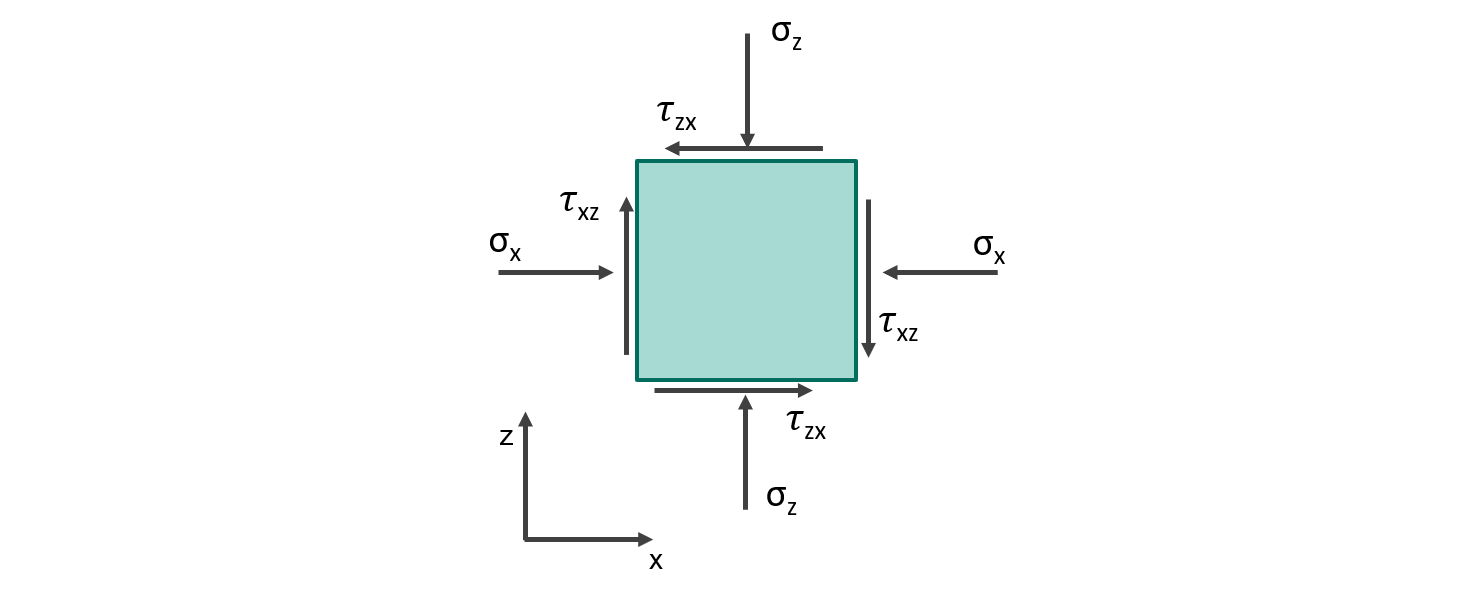

 ### Exercício



 Varie os valores de tensão atuantes para obter as seguintes situações. Quais as faixas de valores de $\sigma_1$ e $\sigma_3$ correspondentes (veja o exemplo no primeiro caso)?



 1. Compressão em um único eixo: $\sigma_1 > 0, \sigma_3 = 0$



 2. Tração em um único eixo



 3. Cisalhamento puro



 4. Compressão "triaxial" (considerando $\sigma_2 = \sigma_3$)

 ## Critério de ruptura de Mohr-Coulomb



 O critério de ruptura estabelece as condições para as quais as tensões que atuam no solo em um determinado plano se igualam a resistência ao cisalhamento do solo e consequentemente ocorre a ruptura generalizada do solo.



 O critério de ruptura proposto por Mohr-Coulomb estabelece uma relação linear entre a **tensão normal** ($\sigma$) e **cisalhante** ($\tau$) no plano de ruptura, dada por:



 $$

     \tau = c + \sigma' \tan \varphi

 $$



 onde $c$ é a **coesão** e $\varphi$ é o **ângulo de atrito interno** do solo.



 No exemplo abaixo, observamos o que ocorre quando temos o aumento da **poropressão** ($\mu$) com o aumento da saturação do solo, e consequente perda da **tensão efetiva** ($\sigma'$), resultando em um novo estado de tensões:



 $$

     \sigma' = \sigma - \mu

 $$

In [3]:
def calc_critical_state(s1, s3, c, phi):
    s_m = (s1 + s3)/2
    r = (s1 - s3)/2
    tan_phi = np.tan(np.deg2rad(phi))
    s_crits = np.roots([tan_phi**2 + 1, 2*c*tan_phi - 2*s_m, c**2 + s_m**2 - r**2])
    s_crit = s_crits[1]
    tau_crit = c + tan_phi*s_crit
    return s_crit, tau_crit


def plot_mohr_circle(ax, s1, s3, angle=180., color='red', ls='-'):
    ax.add_patch(patches.Circle(((s1 + s3)/2, 0.), radius=(s1 - s3)/2,
                 fill=None, lw=2, angle=angle, color=color, ls=ls))
    ax.set(adjustable='box', aspect='equal')
    ax.set_xlabel(r"$\sigma$ (kPa)")
    ax.set_ylabel(r'$\tau$ (kPa)')


def plot_friction(ax, c, phi, x_lim, ls='-', color='black'):
    x_lim = np.array(x_lim)
    ax.plot(x_lim, c + np.tan(np.deg2rad(phi))*x_lim, color=color, ls=ls)


def plot_interactive_effective():
    @interact(c=widgets.FloatSlider(value=30., min=0., max=100., step=1., description='c (kPa)'),
              f=widgets.FloatSlider(value=30., min=0., max=100., step=1., description=r'φ (°)'),
              u=widgets.FloatSlider(value=0., min=-100., max=100., step=1., description='µ (kPa)'))
    def plot_MC(c, f, u):
        fig, ax = plt.subplots()
        s1 = 300  # kPa
        s3 = 100  # kPa

        # Tensões totais
        plot_mohr_circle(ax, s1, s3, angle=180.)
        ax.annotate("$\\sigma_1$", (s1, 0))
        ax.annotate("$\\sigma_3$", (s3, 0))

        # Tensões efetivas
        s1_eff = s1 - u
        s3_eff = s3 - u
        if not u == 0:
            plot_mohr_circle(ax, s1_eff, s3_eff, angle=180., ls='--')
            ax.annotate("$\\sigma_1'$", (s1_eff, 0))
            ax.annotate("$\\sigma_3'$", (s3_eff, 0))

        # Resistência ao cisalhamento
        plot_friction(ax, c, f, [0, 400])

        # Critério de ruptura
        s_crit, tau_crit = calc_critical_state(s1_eff, s3_eff, c, f)
        if np.isreal(s_crit):
            plt.plot(s_crit, tau_crit, 'o', color='black')
            plt.annotate('$(\\sigma^*,\\tau^*)$', (s_crit, tau_crit-20), color='black')

        # Layout
        ax.set_xlim(0, 400)
        ax.set_ylim(0, 200)
        plt.show()


plot_interactive_effective()



interactive(children=(FloatSlider(value=30.0, description='c (kPa)', step=1.0), FloatSlider(value=30.0, descri…

 ### Exercício



 Discuta as seguintes situações:



 1. O que ocorre com o Círculo de Mohr quando se aumenta a poropressão? Explique.



 2. Para que valor aproximado de poropressão ocorre a ruptura? Quais parâmetros influenciam neste resultado?



 3. Qual seria o impacto da capilaridade no Círculo de Mohr? Por quê?



 ---

 ---

 #### **PROJETO: REPOSITÓRIO PYTHON PARA GEOTECNIA _(PYTHON REPOSITORY FOR GEOTECHNICS)_**

 Este repositório faz parte do projeto de extensão da **Universidade Federal de Santa Catarina** (UFSC) denominado **"Repositório Python para Geotecnia"**, cujo objetivo é desenvolver e compartilhar scripts interativos de geotecnia.\

 _This repostitory is part of the extension project of the **Federal University of Santa Catarina** (UFSC) called **"Python Repository for Geotechnics"**, which aims to develop and share interactive scripts for geotechnical engineering._



 ##### **Contato: _(Contact:)_**

 - Prof. Stephanie Thiesen* (coordenadora/_coordinator_): `stephanie.thiesen@ufsc.br` \

  *Para sugestões, entre em contato pelo e-mail \

 _*For suggestions, please contact via e-mail_



 **Isenção de Responsabilidade:**

 Os autores deste projeto não se responsabilizam por quaisquer usos indevidos, imprecisões ou danos resultantes da aplicação dos scripts e funções contidos neste repositório. O uso dos materiais é de responsabilidade exclusiva do usuário. \

 **_Disclaimer:_** _The authors of this project are not responsible for any misuse, inaccuracies, or damages resulting from the application of the scripts and functions contained in this repository. The use of the materials is the sole responsibility of the user._



 ---

 ---